# Nettoyage et Préparation des Données 

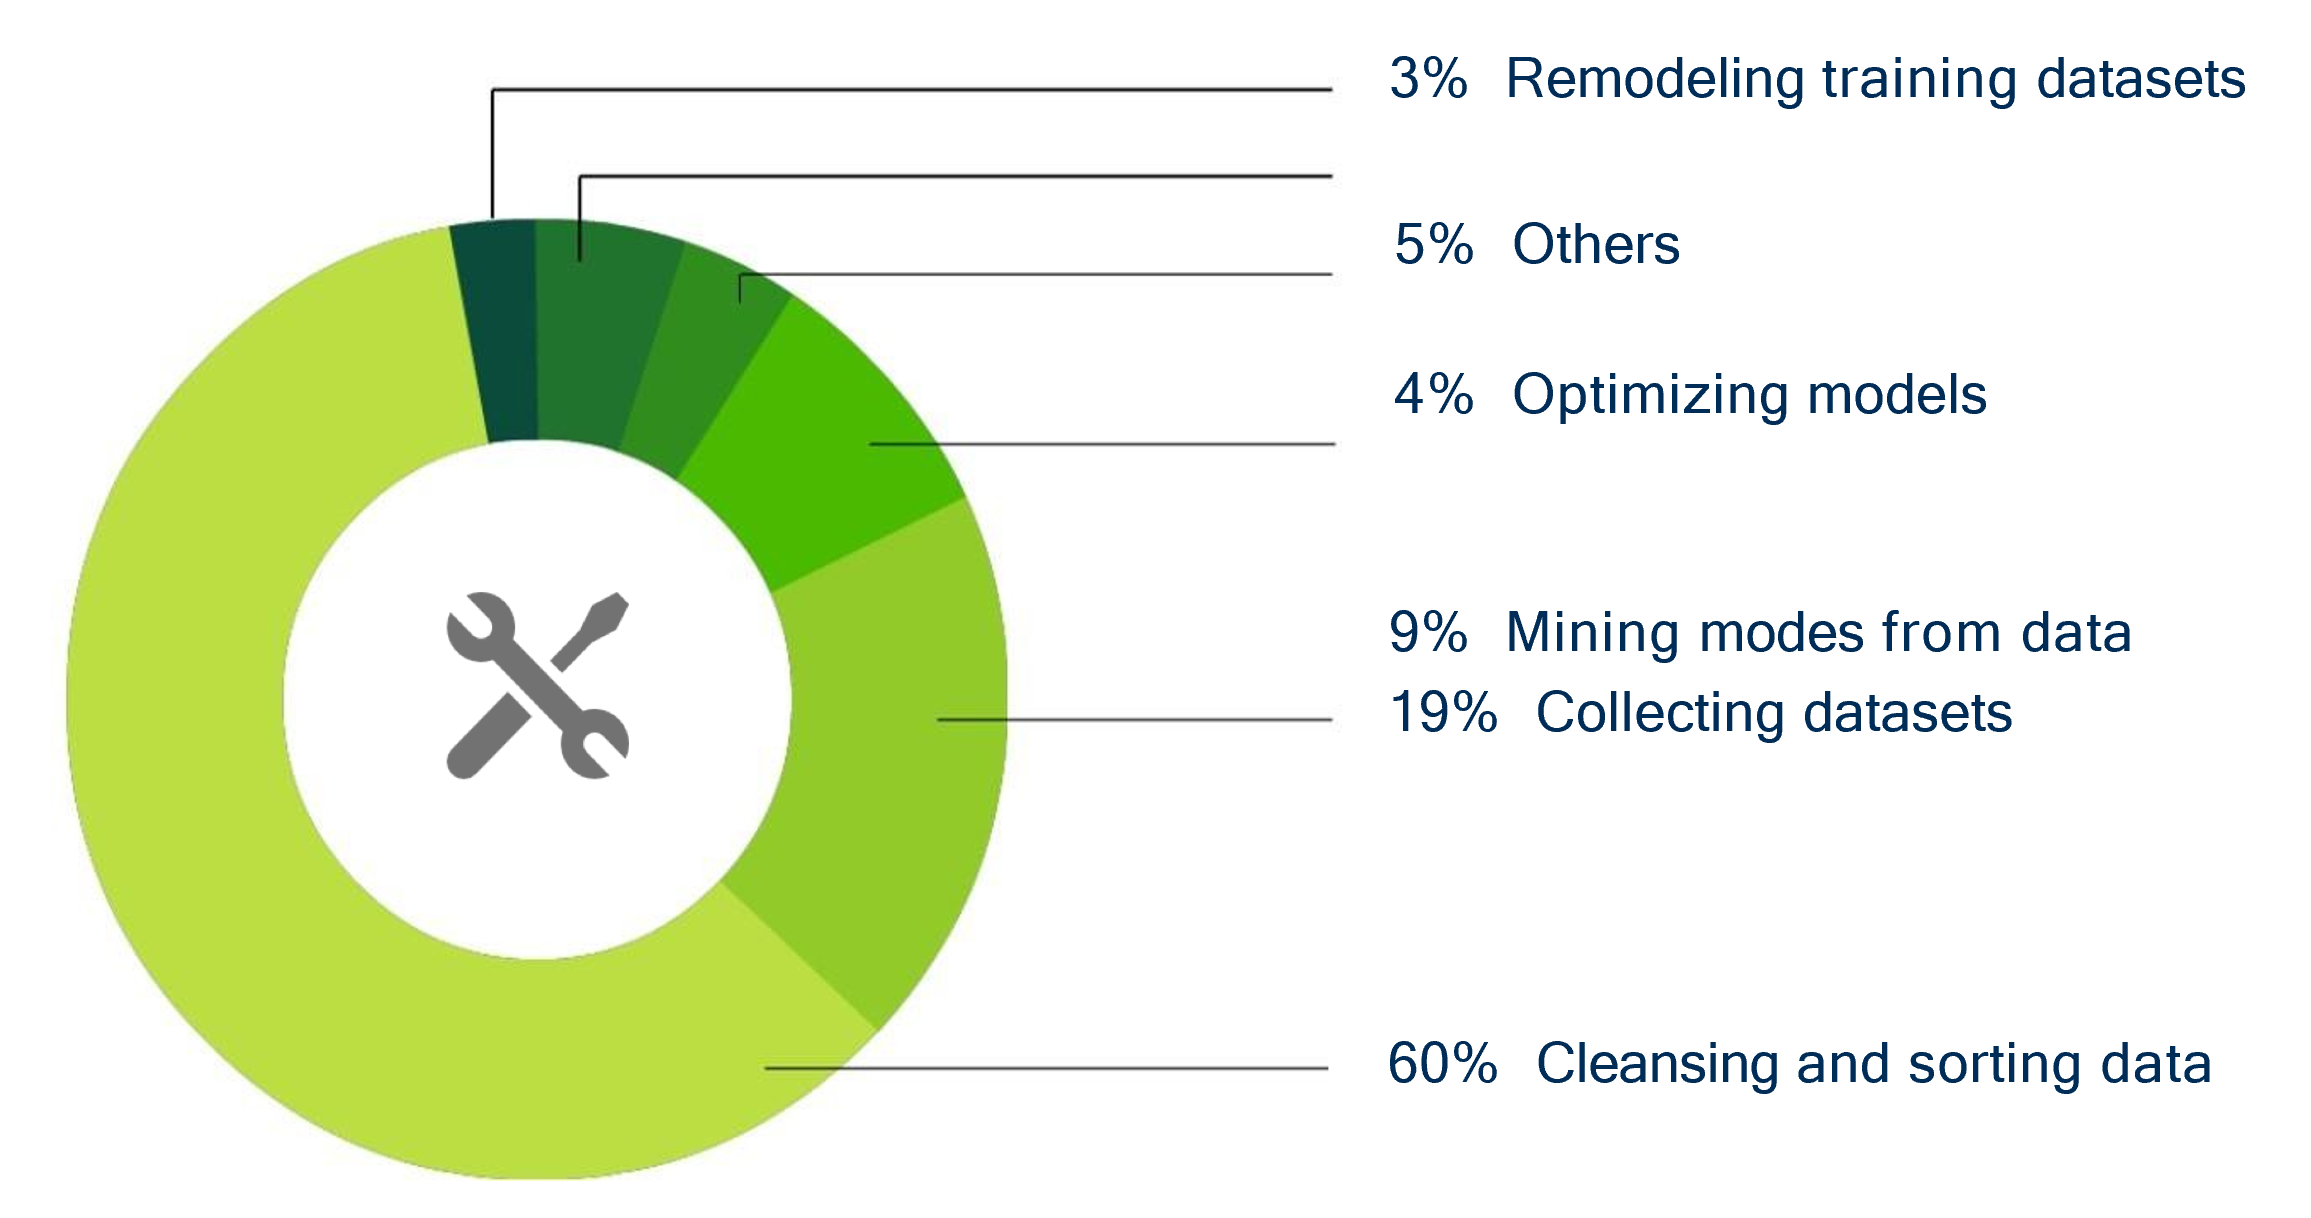

## import libraries

In [1]:
import pandas as pd

## Lire Dataset

In [2]:
data = pd.read_csv('shows.csv')


## Explorer la dataset

In [3]:
data.head()


,Age,Experience,Rank,Nationality,Income,Label
0,36,10.0,9.0,UK,10000.0,NO
1,42,NaN,4.0,USA,NaN,NO
2,23,4.0,NaN,FR,NaN,NO
3,52,4.0,4.0,NaN,NaN,NO
4,43,21.0,8.0,USA,NaN,YES


In [4]:
#taille de la dataset
data.shape
#13 echantillons
# 5 features (caracterisqitues)
# l'etiquette = Label (representant la classe/ categorie)

(13, 6)

In [5]:
#resume statisique
data.describe()

,Age,Experience,Rank,Income
count,13.000000,12.000000,12.000000,2.000000
mean,39.615385,8.583333,6.916667,15000.000000
std,13.263600,5.900051,1.975225,7071.067812
min,18.000000,3.000000,4.000000,10000.000000
25%,35.000000,3.750000,5.000000,12500.000000
50%,42.000000,7.000000,7.000000,15000.000000
75%,45.000000,13.250000,9.000000,17500.000000
max,66.000000,21.000000,9.000000,20000.000000


In [6]:
data.head(13)

,Age,Experience,Rank,Nationality,Income,Label
0,36,10.0,9.0,UK,10000.0,NO
1,42,NaN,4.0,USA,NaN,NO
2,23,4.0,NaN,FR,NaN,NO
3,52,4.0,4.0,NaN,NaN,NO
4,43,21.0,8.0,USA,NaN,YES
5,44,14.0,5.0,UK,NaN,NO
6,66,3.0,7.0,FR,NaN,YES
7,35,14.0,9.0,UK,NaN,YES
8,52,13.0,7.0,FR,NaN,YES
9,35,5.0,9.0,FR,NaN,YES


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          13 non-null     int64  
 1   Experience   12 non-null     float64
 2   Rank         12 non-null     float64
 3   Nationality  12 non-null     object 
 4   Income       2 non-null      float64
 5   Label        13 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 752.0+ bytes


In [9]:
#Est ce  que la colonne nationalite est categorique:"
data['Nationality'].dtype
print("Est ce  que la colonne nationalite est categorique:",data['Nationality'].dtype == object )

Est ce  que la colonne nationalite est categorique: True


In [10]:
#columns
data.columns

Index(['Age', 'Experience', 'Rank', 'Nationality', 'Income', 'Label'], dtype='object')

In [11]:
#recuperer dans une liste les colonnes numeriques

col_num =[col for col in data.columns if data[col].dtype != object] # (data[col].dtype != object and data[col])!= bool)
col_num

['Age', 'Experience', 'Rank', 'Income']

In [13]:
#recuperer dans une liste les colonnes non numeriques

col_cat =[]
for col in data.columns:
    if (data[col].dtype == object):
        col_cat.append(col)
col_cat

['Nationality', 'Label']

In [16]:
#verifier s'il y a des lignes dupliquees
data.duplicated().any()#sum()
#pas de lignes dupliquees

False

In [18]:
#nb de valeurs uniques (des colonnes categoriques)
data[col_cat].nunique()

Nationality    3
Label          2
dtype: int64

In [19]:
#labels uniques
data['Label'].unique() # etiquette

array(['NO', 'YES'], dtype=object)

In [20]:
#nationalites uniques
data['Nationality'].unique()

array(['UK', 'USA', 'FR', nan], dtype=object)

## Data Cleaning

In [97]:
#supprimer les donnees dupliquees (verifier avec un expert de donnees)
data.drop_duplicates(inplace = True)# supprimer les lignes dupliquees dans la dataframe elle meme


,Age,Experience,Rank,Nationality,Income,Label
0,36,10.0,9.0,UK,10000.0,NO
1,42,NaN,4.0,USA,NaN,NO
2,23,4.0,NaN,FR,NaN,NO
3,52,4.0,4.0,NaN,NaN,NO
4,43,21.0,8.0,USA,NaN,YES
5,44,14.0,5.0,UK,NaN,NO
6,66,3.0,7.0,FR,NaN,YES
7,35,14.0,9.0,UK,NaN,YES
8,52,13.0,7.0,FR,NaN,YES
9,35,5.0,9.0,FR,NaN,YES


In [31]:
#pourcentage des valeurs nulles
round(100*data.isnull().sum()/data.shape[0], 2)# (len(data))


Age             0.00
Experience      7.69
Rank            7.69
Nationality     7.69
Income         84.62
Label           0.00
dtype: float64

In [27]:
len(data)

13

### Handling missing values
### Traitement des donnees manquantes

In [32]:
#colonne Income: supprimer la colonne Income puisque il y a 85% des donnees manquantes
data.drop(columns = ["Income"], axis = 1, inplace = True)

In [33]:
data.head()

,Age,Experience,Rank,Nationality,Label
0,36,10.0,9.0,UK,NO
1,42,NaN,4.0,USA,NO
2,23,4.0,NaN,FR,NO
3,52,4.0,4.0,NaN,NO
4,43,21.0,8.0,USA,YES


In [43]:
#colonne Nationality: supprimer les echantillons avec "Nationality" manquante
data.dropna(subset=['Nationality'], axis =0, inplace = True) #supprimer une ligne
data.head()

,Age,Experience,Rank,Nationality,Label
0,36,10.0,9.0,UK,NO
1,42,NaN,4.0,USA,NO
2,23,4.0,NaN,FR,NO
4,43,21.0,8.0,USA,YES
5,44,14.0,5.0,UK,NO


In [46]:
data.Nationality.isnull().sum()

0

In [48]:
#remplir les donnees manquantes de la colonne Experience avec la moyenne
moy_exp = data.Experience.mean()
data['Experience'] = data['Experience'].fillna(value = moy_exp)
data.head()

,Age,Experience,Rank,Nationality,Label
0,36,10.0,9.0,UK,NO
1,42,9.0,4.0,USA,NO
2,23,4.0,NaN,FR,NO
4,43,21.0,8.0,USA,YES
5,44,14.0,5.0,UK,NO


In [53]:
#mode de la colonne Rank
rank_mode = data['Rank'].mode()[0]
rank_mode

#remplir les donnees manquantes de la colonne Rank avec le rang le plus frequent
data['Rank']= data['Rank'].fillna(value = rank_mode)
data.head()

,Age,Experience,Rank,Nationality,Label
0,36,10.0,9.0,UK,NO
1,42,9.0,4.0,USA,NO
2,23,4.0,9.0,FR,NO
4,43,21.0,8.0,USA,YES
5,44,14.0,5.0,UK,NO


In [50]:
type(rank_mode)

pandas.core.series.Series

In [54]:
#valeurs uniques d'Age
data['Age'].unique()

array([36, 42, 23, 43, 44, 66, 35, 52, 24, 18, 45], dtype=int64)

In [55]:
data.isnull().sum()

Age            0
Experience     0
Rank           0
Nationality    0
Label          0
dtype: int64

## Scaling

In [106]:
#installer scikit-learn
!pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
col_num.remove('Income')

In [58]:
col_num

['Age', 'Experience', 'Rank']

In [59]:
#normaliser l'Age, l'Experience et le Rank
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[col_num] = scaler.fit_transform(data[col_num])


In [60]:
#verifier resultats
data.head()

,Age,Experience,Rank,Nationality,Label
0,-0.202918,0.182574,0.953463,UK,NO
1,0.268375,0.000000,-1.906925,USA,NO
2,-1.224054,-0.912871,0.953463,FR,NO
4,0.346924,2.190890,0.381385,USA,YES
5,0.425473,0.912871,-1.334848,UK,NO


In [61]:
#verifier moy
data[col_num].mean()

Age          -2.312965e-16
Experience    3.700743e-17
Rank          2.035409e-16
dtype: float64

In [62]:
#verifier standard deviation (ecart type)
data[col_num].std()

Age           1.044466
Experience    1.044466
Rank          1.044466
dtype: float64

In [63]:
#Encodage Label
#label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])
data.head()

,Age,Experience,Rank,Nationality,Label
0,-0.202918,0.182574,0.953463,UK,0
1,0.268375,0.000000,-1.906925,USA,0
2,-1.224054,-0.912871,0.953463,FR,0
4,0.346924,2.190890,0.381385,USA,1
5,0.425473,0.912871,-1.334848,UK,0


In [65]:
#labels uniques
data['Label'].unique()

array([0, 1])

In [66]:
data['Label'].dtype

dtype('int32')

In [64]:
#labels classes_
label_encoder.classes_

array(['NO', 'YES'], dtype=object)

In [117]:
#conversion en type int



#### One hot encoding sur la colonne nationalite

In [68]:
#one-hot encoding
data = pd.get_dummies(data, columns=['Nationality'], dtype='int32')
data.head()

,Age,Experience,Rank,Label,Nationality_FR,Nationality_UK,Nationality_USA
0,-0.202918,0.182574,0.953463,0,0,1,0
1,0.268375,0.000000,-1.906925,0,0,0,1
2,-1.224054,-0.912871,0.953463,0,1,0,0
4,0.346924,2.190890,0.381385,1,0,0,1
5,0.425473,0.912871,-1.334848,0,0,1,0


In [70]:
#Separer les features des labels
X = data.drop(columns = 'Label', axis = 1)
X.head()

,Age,Experience,Rank,Nationality_FR,Nationality_UK,Nationality_USA
0,-0.202918,0.182574,0.953463,0,1,0
1,0.268375,0.000000,-1.906925,0,0,1
2,-1.224054,-0.912871,0.953463,1,0,0
4,0.346924,2.190890,0.381385,0,0,1
5,0.425473,0.912871,-1.334848,0,1,0


In [72]:
#label
y = data['Label']
y

0     0
1     0
2     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Label, dtype: int32

In [74]:
#split en train et test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size = 0.8, random_state =1)

In [75]:
#shape
X_train.shape

(9, 6)

In [77]:
X_test.shape

(3, 6)

In [79]:
y_train.shape

(9,)

In [80]:
y_test.shape

(3,)